In [14]:
"""
This code will import the raw .csv file and take the average for each patient.
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('T_meds.csv', delimiter=',')

column_names = set(df.columns)
column_names.remove('start_day')
column_names.remove('end_day')

dataframe = df[column_names]

dataframe['drug'].nunique()
dataframe.groupby(['drug']).groups.keys()

dict_keys(['atenolol', 'atorvastatin', 'bisoprolol', 'canagliflozin', 'carvedilol', 'dapagliflozin', 'irbesartan', 'labetalol', 'losartan', 'lovastatin', 'metformin', 'metoprolol', 'nebivolol', 'olmesartan', 'pitavastatin', 'pravastatin', 'propranolol', 'rosuvastatin', 'simvastatin', 'telmisartan', 'valsartan'])

In [13]:
dataframe['daily_dosage'].nunique()
dataframe.groupby(['daily_dosage']).groups.keys()

dict_keys([2.0, 5.0, 6.25, 10.0, 12.5, 20.0, 25.0, 40.0, 50.0, 80.0, 100.0, 150.0, 160.0, 200.0, 300.0, 320.0, 500.0, 600.0, 640.0, 750.0, 850.0, 1000.0, 1500.0, 1700.0, 2000.0, 2550.0])

In [5]:
dataframe['drugdosage'] = dataframe['drug'] + dataframe['daily_dosage'].astype(str)

C:\Users\MED\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
#dataframe.groupby('drugdosage')['id'].count()

In [7]:
new_cols = set(dataframe.columns)

dataframe2 = dataframe[new_cols]
columnsTitles=["id","drugdosage", 'drug', 'daily_dosage']
dataframe2 = dataframe2.reindex(columns=columnsTitles)

In [8]:
dataframe3 = dataframe2.drop_duplicates(keep='first')
dataframe3.head()

,id,drugdosage,drug,daily_dosage
0,0,atorvastatin10.0,atorvastatin,10.0
2,0,losartan100.0,losartan,100.0
5,0,metformin1000.0,metformin,1000.0
11,1,atorvastatin20.0,atorvastatin,20.0
13,1,atorvastatin40.0,atorvastatin,40.0


In [9]:
df2 = pd.read_csv('T_stage2.csv')
df2['Class'] = df2['Class'].replace(to_replace={'ckd':1.0,'notckd':0.0})
df2.head()

,id,Class
0,0,1.0
1,1,0.0
2,2,1.0
3,3,0.0
4,4,1.0


In [10]:
dataframe3 = dataframe3[['id', 'drugdosage', 'drug', 'daily_dosage']].merge(df2[['id','Class']], on='id', how='left')

In [11]:
dataframe3.to_csv('datameds.csv')
dataframe3.head()

,id,drugdosage,drug,daily_dosage,Class
0,0,atorvastatin10.0,atorvastatin,10.0,1.0
1,0,losartan100.0,losartan,100.0,1.0
2,0,metformin1000.0,metformin,1000.0,1.0
3,1,atorvastatin20.0,atorvastatin,20.0,0.0
4,1,atorvastatin40.0,atorvastatin,40.0,0.0


In [12]:
drugclass = dataframe3.groupby(['drug','Class'])['id'].count()
drugclass.to_csv('datadrugclass.csv')

C:\Users\MED\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [236]:
dataframe3.groupby(['drugdosage','Class'])['id'].count()

drugdosage      Class
atenolol100.0   0.0      5
                1.0      5
atenolol25.0    0.0      5
                1.0      1
atenolol50.0    0.0      8
                        ..
valsartan320.0  0.0      9
                1.0      5
valsartan640.0  0.0      3
                1.0      4
valsartan80.0   1.0      1
Name: id, Length: 113, dtype: int64

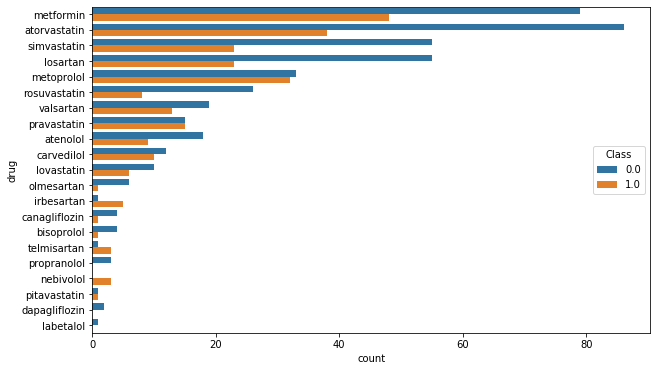

In [17]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(y = 'drug', hue='Class', data=dataframe3, order = dataframe3['drug'].value_counts().index)


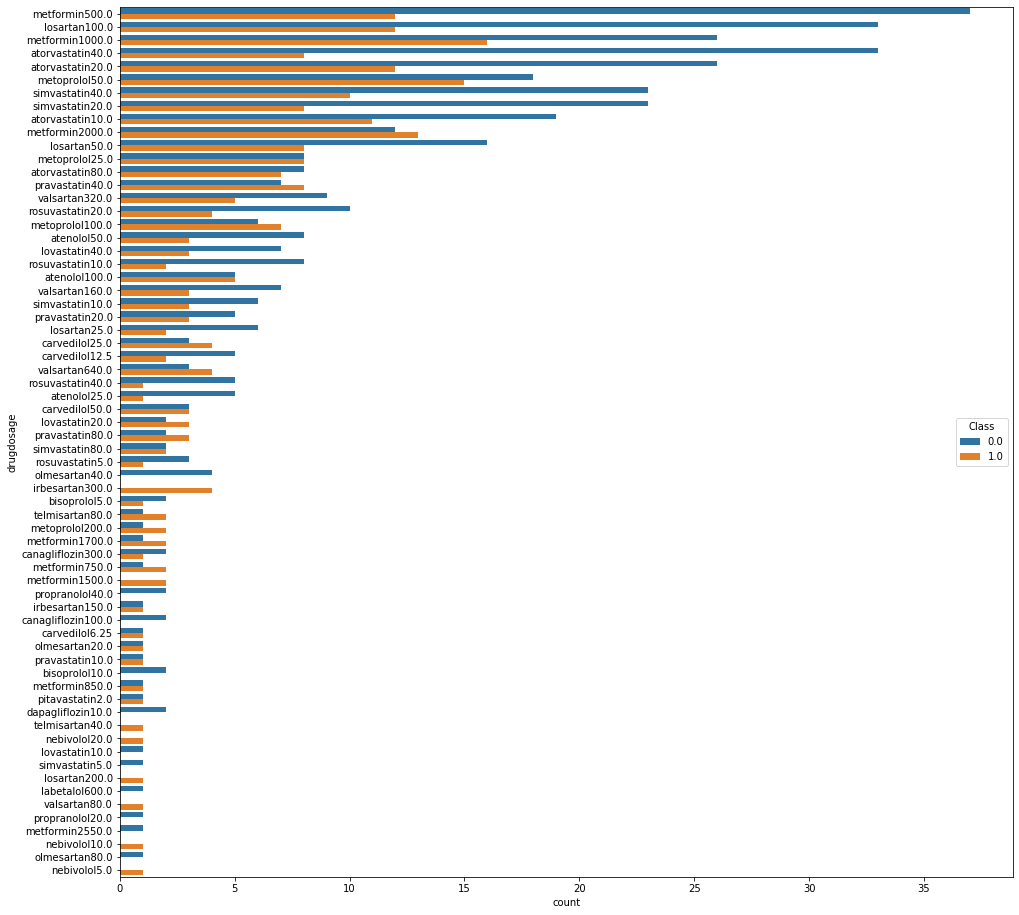

In [30]:
import seaborn as sns
plt.figure(figsize=(16, 16))
sns.countplot(y = 'drugdosage', hue='Class', data=dataframe3, order = dataframe3['drugdosage'].value_counts().index)
plt.savefig('df_drugdosage')

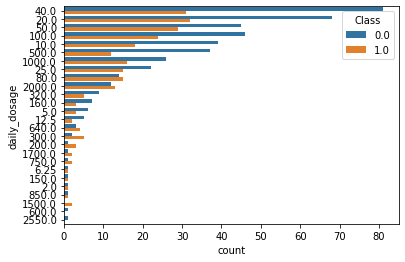

In [282]:
import seaborn as sns
sns.countplot(y = 'daily_dosage', hue='Class', data=dataframe3, order = dataframe3['daily_dosage'].value_counts().index)

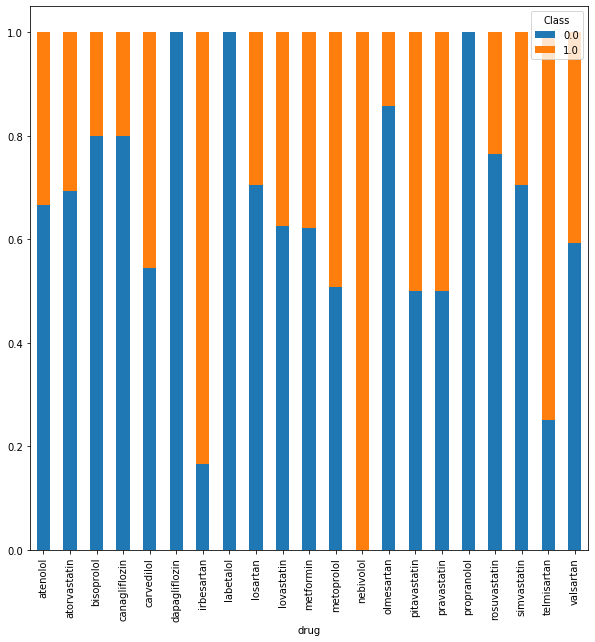

In [27]:
props = dataframe3.groupby("drug")['Class'].value_counts(normalize=True).unstack()

props.plot(kind='bar', stacked='True', figsize=(10,10))
plt.savefig('df_drugclass')